In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import lasso_path
# Load data, inspect and do exploratory plots

import matplotlib as mpl
plt.style.use("fivethirtyeight")
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

442 10
(442,)


Text(0.5, 1.0, 'Scatter of Two Inputs')

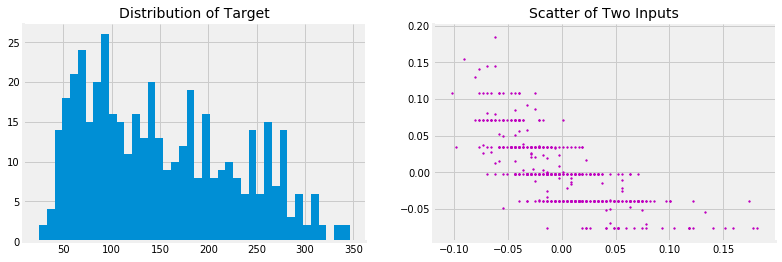

In [2]:
diabetes = datasets.load_diabetes()
Y = diabetes.data
f = diabetes.target
NumData, NumFeatures = Y.shape
print(NumData, NumFeatures)
print(f.shape)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(f, bins=40)
ax[0].set_title("Distribution of Target", fontsize=14)
ax[1].scatter(Y[:,6], Y[:,7], c="m", s=3)
ax[1].set_title("Scatter of Two Inputs", fontsize=14)

Text(0.5, 1.0, 'Pseudoinverse')

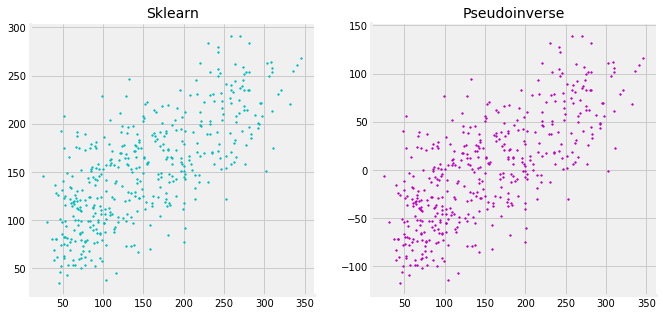

In [3]:
# Linear regression using sklearn
lin = LinearRegression()
lin.fit(Y, f)
fh1 = lin.predict(Y)

# Pseudo-inverse solution to linear regression
a = np.linalg.inv(Y.T @ Y) @ Y.T @ f
fh2 = Y @ a

# Plot predictions to check if they look the same
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(f, fh1, c="c", s=3)
ax[0].grid(True)
ax[0].set_title("Sklearn", fontsize=14)
ax[1].scatter(f, fh2, c="m", s=3)
ax[1].grid(True)
ax[1].set_title("Pseudoinverse", fontsize=14)

In [4]:
aaaaaaaaaaaa = '''gamma = 0.5
aR = np.linalg.inv(Y.T@Y+ gamma*np.identity(NumFeatures)) @ Y.T @ f
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title("Pseudo-inverse solution", fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))
ax[1].bar(np.arange(len(aR)), aR)
ax[1].set_title("Regularized solution", fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))

from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(Y, f)
yh_lasso = ll.predict(Y)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title("Pseudo-inverse solution", fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))
ax[1].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[1].set_title("Lasso solution", fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))'''

(-792.1841616279548, 751.2793210872132)

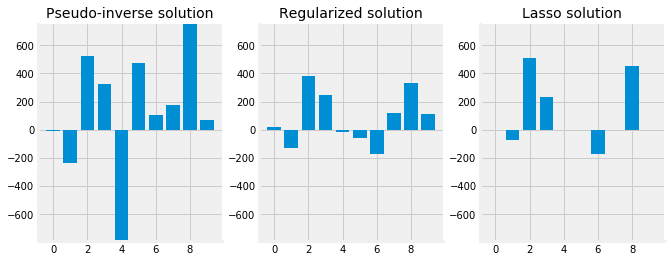

In [5]:
gamma = 0.5
aR = np.linalg.inv(Y.T@Y+ gamma*np.identity(NumFeatures)) @ Y.T @ f
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,4))

from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(Y, f)
yh_lasso = ll.predict(Y)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title("Pseudo-inverse solution", fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))
ax[1].bar(np.arange(len(aR)), aR)
ax[1].set_title("Regularized solution", fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))
ax[2].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[2].set_title("Lasso solution", fontsize=14)
ax[2].grid(True)
ax[2].set_ylim(np.min(a), np.max(a))

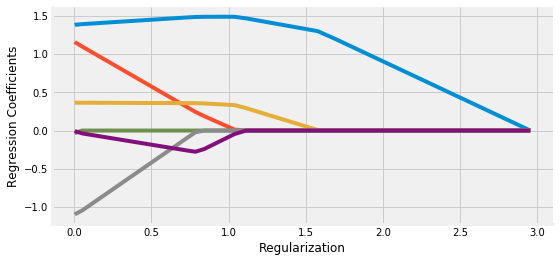

In [6]:
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))
    
# Compute regressions with Lasso and return paths
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)

# Plot each coefficient
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")

(932, 2261)
Index([                    0, 'Compound_Identifier',              'Source',
                    'SMILES',             'LogS.M.',                  'MW',
                       'AMW',                  'Sv',                  'Se',
                        'Sp',
       ...
              'Psychotic-80',        'Psychotic-50',        'Hypertens-80',
              'Hypertens-50',         'Hypnotic-80',         'Hypnotic-50',
             'Neoplastic-80',       'Neoplastic-50',        'Infective-80',
        'Infective-50\r\r\n'],
      dtype='object', length=2261)
(932, 2256)
(932,)


Text(0.5, 1.0, 'Test Data')

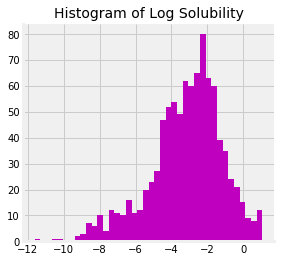

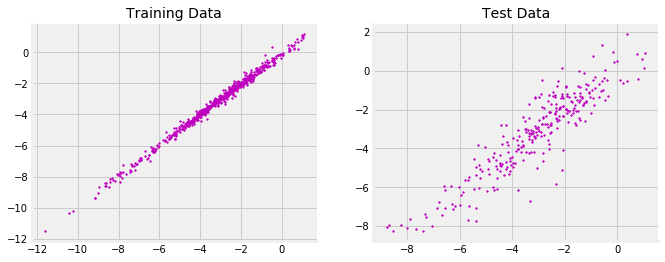

In [7]:
try:
    sol
except:
    sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
colnames = sol.columns
print(colnames)
f = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(f, bins=40, facecolor="m")
ax.set_title("Histogram of Log Solubility", fontsize=14)
ax.grid(True)
5
Y = sol[colnames[5:len(colnames)]]
N, p = Y.shape
print(Y.shape)
print(f.shape)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
Y_train, Y_test, f_train, f_test = train_test_split(Y, f, test_size=0.3)

# Regularized regression
gamma = 2.3
a = np.linalg.inv(Y_train.T @ Y_train + gamma*np.identity(p)) @ Y_train.T @ f_train
fh_train = Y_train @ a.values
fh_test = Y_test @ a.values

# Plot training and test predictions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, fh_train, c="m", s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(f_test, fh_test, c="m", s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)

# Over to you for implementing Lasso